# Heart Disease Predicition Machine Learning Model - No ECG

### Objective: Heart disease is one of the leading causes of death in America and being able to detect heart disease promptly can have a number of benefits. In this project, we will try to detect heart disease using supervised machine learning strategies. This model is not intended to replace doctors by any means, instead this model is intended to be a tool to assist physicians in their decision making.
Data Source: https://www.kaggle.com/fedesoriano/heart-failure-prediction
##### Kaggle Project overview:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of five CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

!pip install category_encoders
%matplotlib inline

### As found in previous notebooks, there are a few rows with missing cholesterol data.  I will change missing values to the sample median.

In [2]:
heart_data=pd.read_csv("heart.csv.xls")

In [3]:
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart_data['Cholesterol']=heart_data['Cholesterol'].replace(0,heart_data['Cholesterol'].median())

In [5]:
heart_data_no_ecg=heart_data.drop(columns=['ST_Slope', 'RestingECG', 'Oldpeak'])

In [6]:
heart_data_no_ecg['Cholesterol']=heart_data_no_ecg['Cholesterol'].replace(0,heart_data_no_ecg['Cholesterol'].median())

In [7]:
heart_data_no_ecg

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,HeartDisease
0,40,M,ATA,140,289,0,172,N,0
1,49,F,NAP,160,180,0,156,N,1
2,37,M,ATA,130,283,0,98,N,0
3,48,F,ASY,138,214,0,108,Y,1
4,54,M,NAP,150,195,0,122,N,0
...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,132,N,1
914,68,M,ASY,144,193,1,141,N,1
915,57,M,ASY,130,131,0,115,Y,1
916,57,F,ATA,130,236,0,174,N,1


In [8]:
heart_data_no_ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   MaxHR           918 non-null    int64 
 7   ExerciseAngina  918 non-null    object
 8   HeartDisease    918 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 64.7+ KB


#### I will be running the model without ECG analysis later in this study.  and will be using the data frame labeled heart_data_no_ecg

## Setting up categrory encoding for the categorical data

In [9]:
import category_encoders as ce

In [10]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [11]:
y=heart_data_no_ecg['HeartDisease']

In [12]:
X=heart_data_no_ecg.drop('HeartDisease',  axis='columns')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [14]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (734, 8) (734,)
Test (184, 8) (184,)


In [15]:
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)


In [16]:
print(X_train_enc)

     Age  Sex_M  Sex_F  ChestPainType_ASY  ChestPainType_NAP  \
852   43      1      0                  1                  0   
121   52      0      1                  0                  1   
664   65      0      1                  1                  0   
187   41      1      0                  1                  0   
108   50      1      0                  1                  0   
..   ...    ...    ...                ...                ...   
767   54      0      1                  0                  1   
72    52      1      0                  1                  0   
908   63      1      0                  1                  0   
235   39      1      0                  0                  0   
37    41      0      1                  0                  0   

     ChestPainType_TA  ChestPainType_ATA  RestingBP  Cholesterol  FastingBS  \
852                 0                  0        120          177          0   
121                 0                  0        125          272         

In [17]:
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 852 to 37
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                734 non-null    int64
 1   Sex_M              734 non-null    int64
 2   Sex_F              734 non-null    int64
 3   ChestPainType_ASY  734 non-null    int64
 4   ChestPainType_NAP  734 non-null    int64
 5   ChestPainType_TA   734 non-null    int64
 6   ChestPainType_ATA  734 non-null    int64
 7   RestingBP          734 non-null    int64
 8   Cholesterol        734 non-null    int64
 9   FastingBS          734 non-null    int64
 10  MaxHR              734 non-null    int64
 11  ExerciseAngina_Y   734 non-null    int64
 12  ExerciseAngina_N   734 non-null    int64
dtypes: int64(13)
memory usage: 80.3 KB


## Modeling with Logistic Regression

In [18]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=9000)

In [19]:
logmodel.fit(X_train_enc, y_train)

LogisticRegression(max_iter=9000)

In [20]:
predictions=logmodel.predict(X_test_enc)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.82      0.81        74\n           1       0.88      0.86      0.87       110\n\n    accuracy                           0.85       184\n   macro avg       0.84      0.84      0.84       184\nweighted avg       0.85      0.85      0.85       184\n'

In [23]:
confusion_matrix(y_test,predictions)

array([[61, 13],
       [15, 95]])

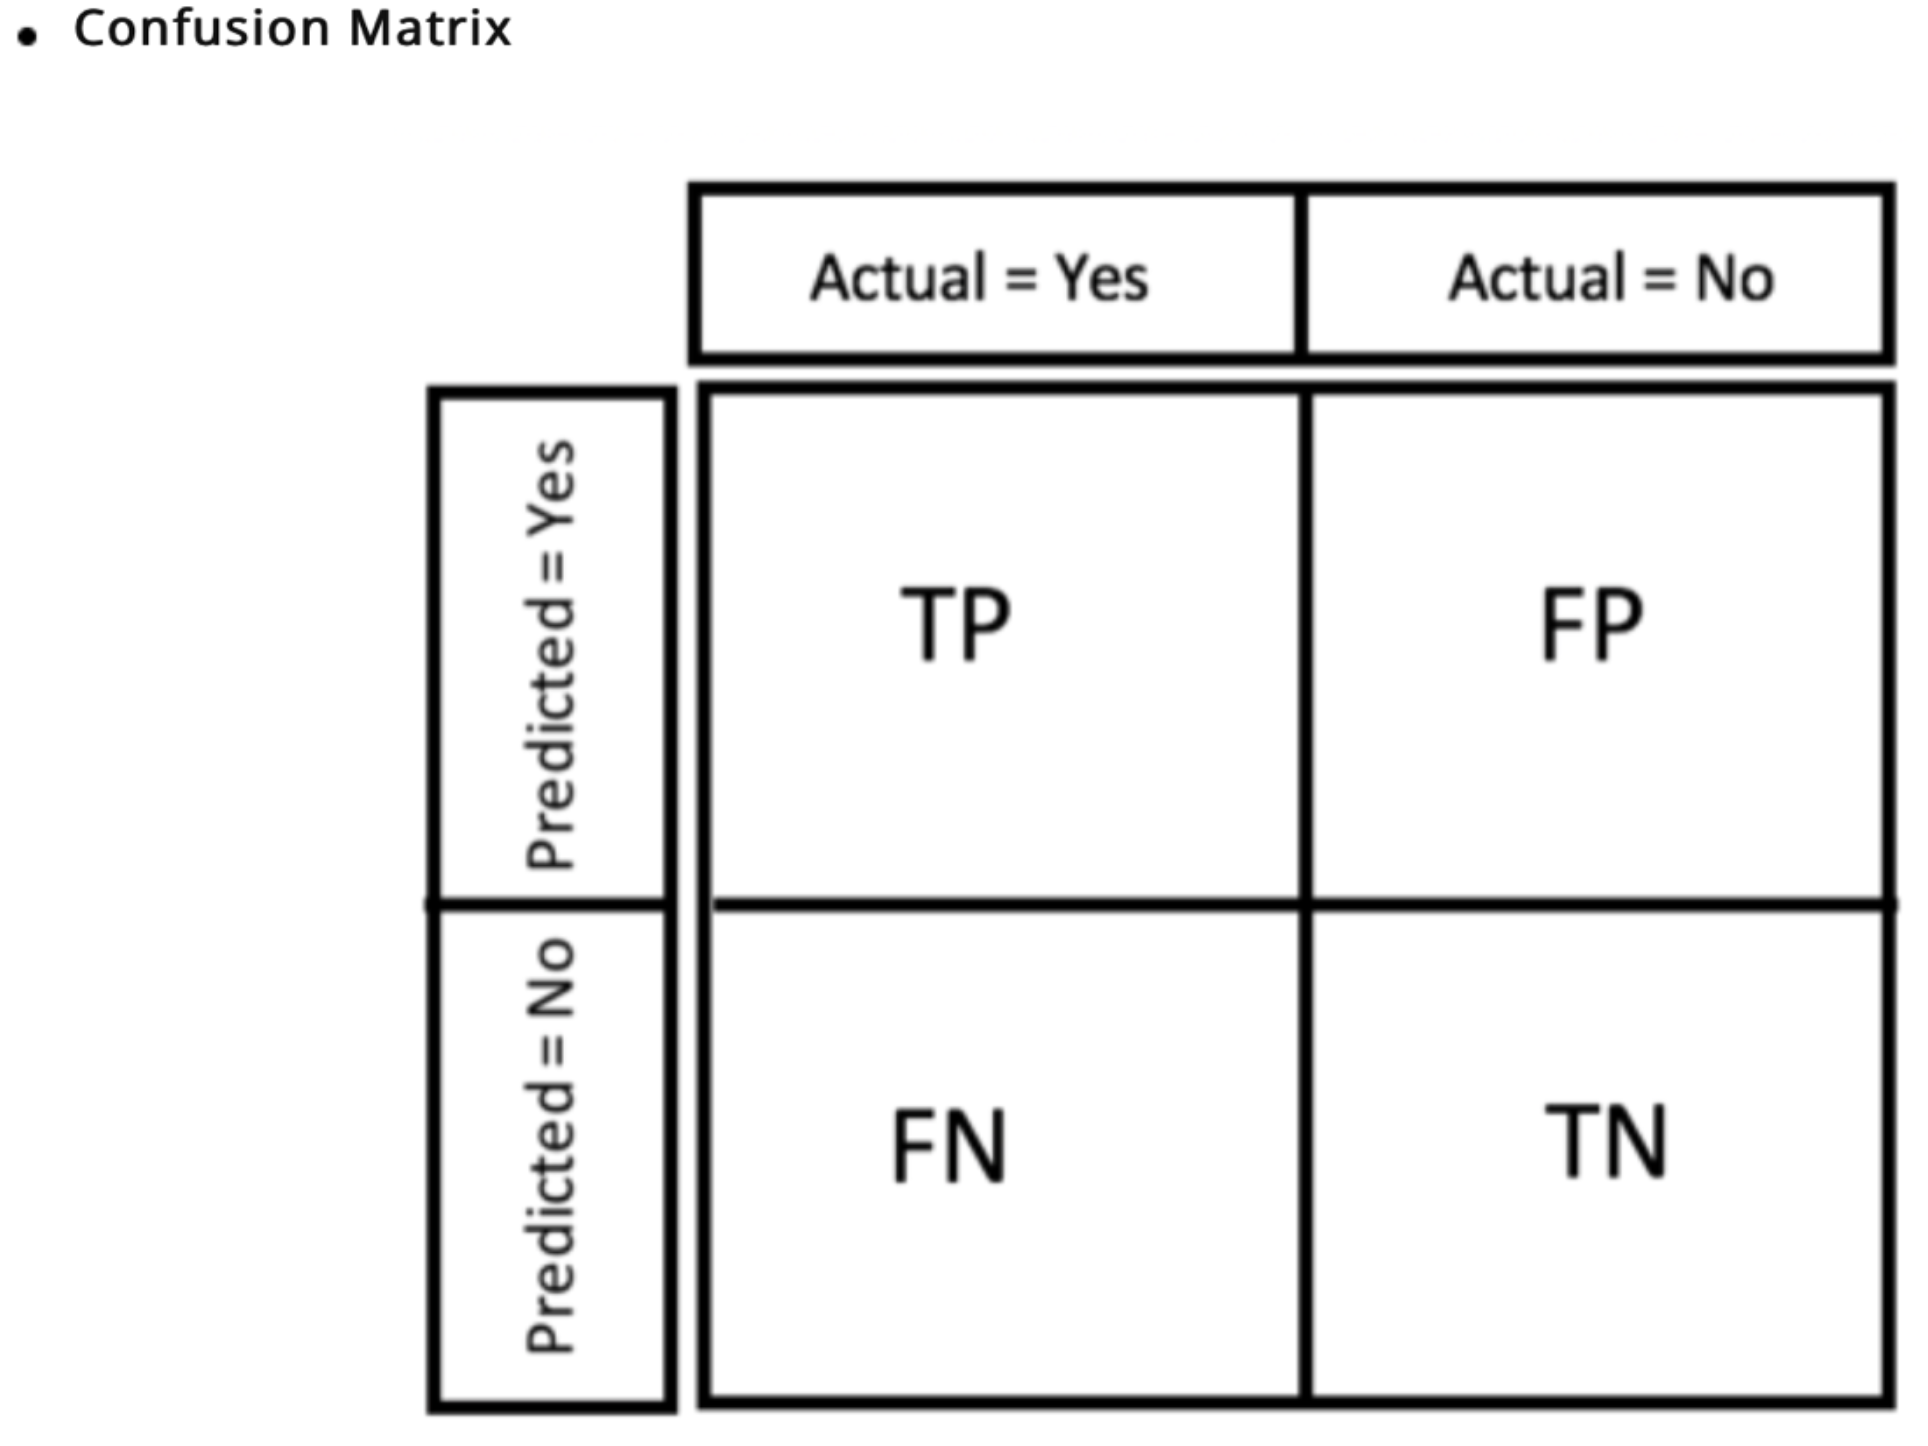

In [430]:
from sklearn.model_selection import KFold

In [457]:
kf = KFold(n_splits = 7, shuffle = True)

In [458]:
scores =[]

In [459]:
for i in range(7):
    result=next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    encoder.fit(X_train)
    X_train_enc = encoder.transform(X_train)
    X_test_enc = encoder.transform(X_test)
    model = logmodel.fit(X_train_enc, y_train)
    predictions = logmodel.predict(X_test_enc)
    scores.append(model.score(X_test_enc, y_test))
    
print(scores)
print(np.mean(scores))

[0.8409090909090909, 0.8257575757575758, 0.7954545454545454, 0.8560606060606061, 0.8181818181818182, 0.8409090909090909, 0.8636363636363636]
0.8344155844155843


In [195]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [196]:
accuracy_score(y_test,predictions)

0.842391304347826

In [197]:
print('The Precision Score- we will diagnose yes heart disease correctly at this percent: ' + str(precision_score(y_test,predictions)))
print('The Recall Score - We will catch this percent of patients who actually do have heart disease : ' + str(recall_score(y_test,predictions)))



The Precision Score- we will diagnose yes heart disease correctly at this percent: 0.8857142857142857
The Recall Score - We will catch this percent of patients who actually do have heart disease : 0.8454545454545455


In [212]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logmodel, X_train_enc, y_train, cv=15)
print('Cross-Validation Accuracy Scores', scores)
recall = cross_val_score(logmodel, X_train_enc, y_train, cv=15, scoring='recall')
print('Recall', recall)
precision = cross_val_score(logmodel, X_train_enc, y_train, cv=15, scoring='precision')
print('Precision', precision)

Cross-Validation Accuracy Scores [0.75510204 0.75510204 0.87755102 0.75510204 0.7755102  0.81632653
 0.83673469 0.7755102  0.67346939 0.83673469 0.83673469 0.73469388
 0.83673469 0.85714286 0.75      ]
Recall [0.74074074 0.7037037  1.         0.77777778 0.81481481 0.85185185
 0.88888889 0.81481481 0.76923077 0.80769231 0.84615385 0.84615385
 0.76923077 0.92307692 0.73076923]
Precision [0.8        0.82608696 0.81818182 0.77777778 0.78571429 0.82142857
 0.82758621 0.78571429 0.66666667 0.875      0.84615385 0.70967742
 0.90909091 0.82758621 0.79166667]


In [217]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()



(0.673469387755102, 0.7914965986394557, 0.8775510204081632)

In [218]:
recall = pd.Series(recall)
recall.min(), recall.mean(), recall.max()

(0.7037037037037037, 0.8189933523266858, 1.0)

In [219]:
precision = pd.Series(precision)
precision.min(), precision.mean(), precision.max()

(0.6666666666666666, 0.8045554411376338, 0.9090909090909091)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

## Random Forest Model

In [27]:
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

In [28]:
RF_model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [29]:
predictions=RF_model.predict(X_test_enc)

In [30]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.78      0.84      0.81        74\n           1       0.89      0.85      0.87       110\n\n    accuracy                           0.84       184\n   macro avg       0.84      0.84      0.84       184\nweighted avg       0.85      0.84      0.84       184\n'

In [31]:
confusion_matrix(y_test,predictions)

array([[62, 12],
       [17, 93]])

In [32]:
accuracy_score(y_test,predictions)

0.842391304347826

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [34]:
print('The Precision Score- we will diagnose yes heart disease correctly at this percent: ' + str(precision_score(y_test,predictions)))
print('The Recall Score - We will catch this percent of patients who actually do have heart disease : ' + str(recall_score(y_test,predictions)))


The Precision Score- we will diagnose yes heart disease correctly at this percent: 0.8857142857142857
The Recall Score - We will catch this percent of patients who actually do have heart disease : 0.8454545454545455


In [220]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model, X_train_enc, y_train, cv=15)
print('Cross-Validation Accuracy Scores', scores)
recall = cross_val_score(RF_model, X_train_enc, y_train, cv=15, scoring='recall')
print('Recall', recall)
precision = cross_val_score(RF_model, X_train_enc, y_train, cv=15, scoring='precision')
print('Precision', precision)

Cross-Validation Accuracy Scores [0.87755102 0.71428571 0.7755102  0.83673469 0.75510204 0.79591837
 0.71428571 0.7755102  0.75510204 0.91836735 0.91836735 0.75510204
 0.83673469 0.85714286 0.77083333]
Recall [0.88888889 0.66666667 0.88888889 0.77777778 0.81481481 0.81481481
 0.74074074 0.85185185 0.84615385 0.92307692 0.96153846 0.80769231
 0.76923077 0.92307692 0.76923077]
Precision [0.88888889 0.7826087  0.75       0.91304348 0.75862069 0.81481481
 0.74074074 0.76666667 0.73333333 0.92307692 0.89285714 0.75
 0.90909091 0.82758621 0.8       ]


In [221]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.7142857142857143, 0.8037698412698414, 0.9183673469387755)

In [222]:
recall = pd.Series(recall)
recall.min(), recall.mean(), recall.max()

(0.6666666666666666, 0.8296296296296297, 0.9615384615384616)

In [230]:
precision = pd.Series(precision)
precision.min(), precision.mean(), precision.max()

(0.7333333333333333, 0.8167552326622791, 0.9230769230769231)

## Feature Importance and Partial Dependence Plot

In [231]:
importances = RF_model.feature_importances_

In [232]:
RF_model.feature_importances_

array([0.14341996, 0.02461329, 0.02613434, 0.1059046 , 0.02539243,
       0.01099168, 0.05870843, 0.12054574, 0.13717804, 0.03893243,
       0.16592848, 0.06249749, 0.07975309])

<AxesSubplot:>

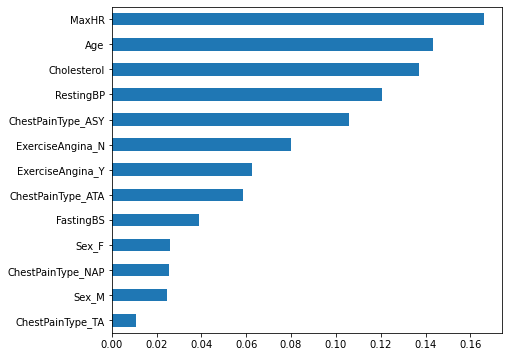

In [233]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train_enc.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(7,6))

In [234]:
from sklearn.inspection import plot_partial_dependence

Text(0.5, 1.0, 'Partial Dependence Plot for Max Heart Rate')

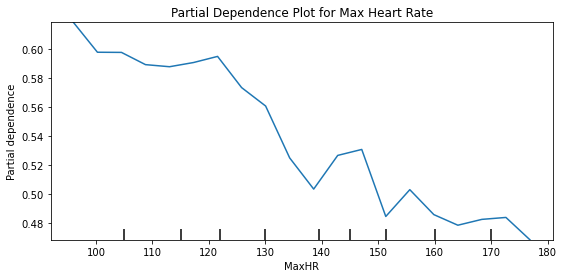

In [235]:
fig, ax = plt.subplots(figsize=(9,4))
plot_partial_dependence(RF_model, X_train_enc, ["MaxHR"], 
                        grid_resolution=20, ax=ax)
plt.title("Partial Dependence Plot for Max Heart Rate")

Text(0.5, 1.0, 'Partial Dependence Plot for Age')

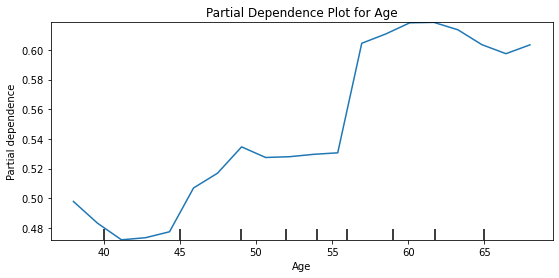

In [236]:
fig, ax = plt.subplots(figsize=(9,4))
plot_partial_dependence(RF_model, X_train_enc, ["Age"], 
                        grid_resolution=20, ax=ax)
plt.title("Partial Dependence Plot for Age")

Text(0.5, 1.0, 'Partial Dependence Plot for Cholesterol')

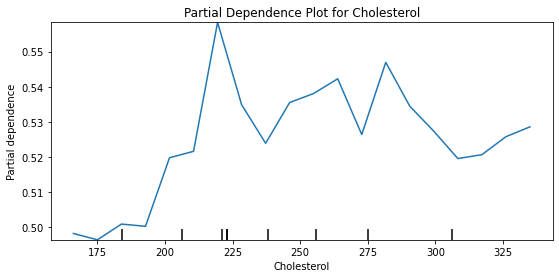

In [237]:
fig, ax = plt.subplots(figsize=(9,4))
plot_partial_dependence(RF_model, X_train_enc, ['Cholesterol'], 
                        grid_resolution=20, ax=ax)
plt.title("Partial Dependence Plot for Cholesterol")

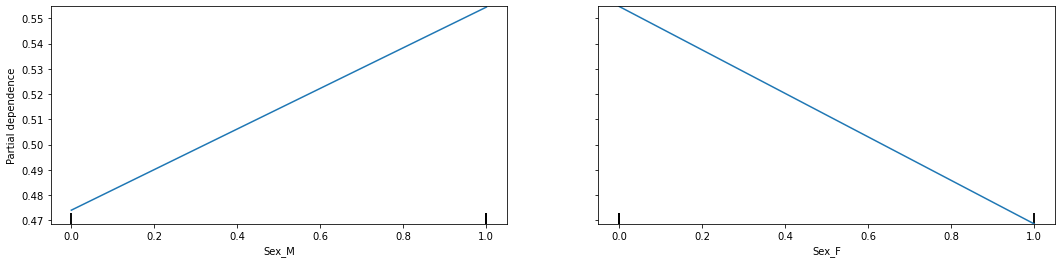

In [238]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Sex_M', 'Sex_F'], 
                        grid_resolution=20, ax=ax)

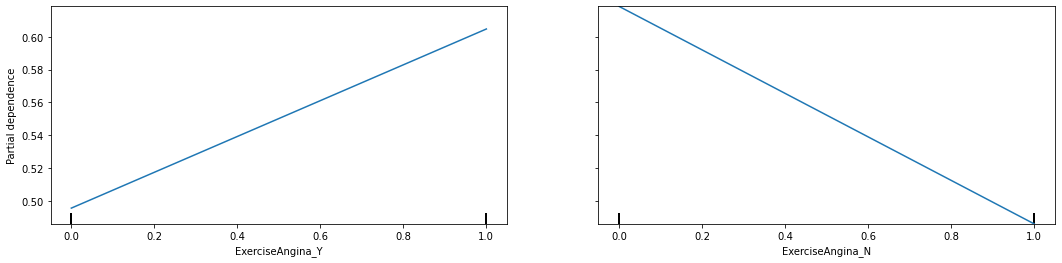

In [239]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['ExerciseAngina_Y', "ExerciseAngina_N"], 
                        grid_resolution=20, ax=ax)

# Heart disease prediction without completing ECG analysis.  

#### Imagine there is a backlog for ECG analysis and an the decision is made to complete a preliminary analysis on patients before determing the next steps.  If we have a patient with high probablity of heart disease based on quick data collection, we would act accordingly.  Contrarily, if we had a patient with very low probablity of heart disease based on quick data collection, we may act differently.  The intention here is to show how this tool could be useful in a fast moving & real life scenario.

In [392]:
d = {}
d['MaxHR'] = float(input('What is the Max Heart Rate of the patient?').casefold())
d['Age'] = float(input('How old is the patient?').casefold())
d['Sex'] = input('What is the sex of the patient (M or F)?').casefold()
d['RestingBP'] = float(input('What is resting blood pressure reading of the patient?').casefold())
d['Cholesterol'] = float(input('What is the cholesterol reading?').casefold())
d['ExerciseAngina'] = input('Is the patient here for exercise induced angina (Y or N) ?').casefold()
d['FastingBS'] = float(input('What is the fasting blood sugar of the patient? [1: if FastingBS > 120 mg/dl, 0: otherwise]').casefold())
d['ChestPainType'] = input('Describe the chest pain type (make sure to use capital letters): [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]').casefold()

print('~~~~~~~~~~~~~~~~~~~~~~~~~')
print('~~~~~~~~~~~~~~~~~~~~~~~~~')
print('~~~~~~~~~~~~~~~~~~~~~~~~~')
print("Before getting an ECG evaluation on the patient, let's determine the current probability of heart disease")

What is the Max Heart Rate of the patient?150
How old is the patient?65
What is the sex of the patient (M or F)?F
What is resting blood pressure reading of the patient?150
What is the cholesterol reading?220
Is the patient here for exercise induced angina (Y or N) ?N
What is the fasting blood sugar of the patient? [1: if FastingBS > 120 mg/dl, 0: otherwise]1
Describe the chest pain type (make sure to use capital letters): [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]NAP
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~
Before getting an ECG evaluation on the patient, let's determine the current probability of heart disease


In [393]:

d

{'MaxHR': 150.0,
 'Age': 65.0,
 'Sex': 'f',
 'RestingBP': 150.0,
 'Cholesterol': 220.0,
 'ExerciseAngina': 'n',
 'FastingBS': 1.0,
 'ChestPainType': 'nap'}

In [394]:
for k,v in d.items():
    if k=='Sex':
        d.update({k: v.upper()})
    if k=='ExerciseAngina':
        d.update({k: v.upper()})
    if k=='ChestPainType':
        d.update({k: v.upper()})

In [395]:
d

{'MaxHR': 150.0,
 'Age': 65.0,
 'Sex': 'F',
 'RestingBP': 150.0,
 'Cholesterol': 220.0,
 'ExerciseAngina': 'N',
 'FastingBS': 1.0,
 'ChestPainType': 'NAP'}

In [396]:
unseen=pd.DataFrame(d.items(), index=d).T

In [397]:
unseen=unseen.drop([0])

In [398]:
unseen1=unseen.drop(columns=['Sex', 'ExerciseAngina', 'ChestPainType'])

In [399]:
unseen1

,MaxHR,Age,RestingBP,Cholesterol,FastingBS
1,150.0,65.0,150.0,220.0,1.0


I will need to convert the categorical values to numeric values so that the model can run

In [400]:
encoder2 = ce.OneHotEncoder(use_cat_names=True)

In [401]:
encoder2.fit(unseen[['Sex', 'ExerciseAngina', 'ChestPainType']])
unseen_enc = encoder2.transform(unseen[['Sex', 'ExerciseAngina', 'ChestPainType']])

In [402]:
unseen_enc

,Sex_F,ExerciseAngina_N,ChestPainType_NAP
1,1,1,1


In [403]:
unseen_with_encoding = pd.concat([unseen_enc, unseen1], axis=1, join="inner")

In [404]:
unseen_with_encoding

,Sex_F,ExerciseAngina_N,ChestPainType_NAP,MaxHR,Age,RestingBP,Cholesterol,FastingBS
1,1,1,1,150.0,65.0,150.0,220.0,1.0


In [405]:
list1=list(unseen_with_encoding.columns.values)

In [406]:
list1

['Sex_F',
 'ExerciseAngina_N',
 'ChestPainType_NAP',
 'MaxHR',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS']

In [407]:
sample=X_train_enc

In [408]:
for column in list1:
    sample=sample.drop(columns=column)


In [409]:
sample

,Sex_M,ChestPainType_ASY,ChestPainType_TA,ChestPainType_ATA,ExerciseAngina_Y
852,1,1,0,0,1
121,0,0,0,0,0
664,0,1,0,0,0
187,1,1,0,0,1
108,1,1,0,0,0
...,...,...,...,...,...
767,0,0,0,0,0
72,1,1,0,0,0
908,1,1,0,0,1
235,1,0,0,1,1


##### Next, I need to create an empty dataframe with all column names present

In [410]:
sample_empty=sample[0:0]

In [411]:
sample_empty

,Sex_M,ChestPainType_ASY,ChestPainType_TA,ChestPainType_ATA,ExerciseAngina_Y


In [412]:
sample_empty1=sample_empty.append(pd.Series(), ignore_index=True)

<ipython-input-412-701b61e1d127>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sample_empty1=sample_empty.append(pd.Series(), ignore_index=True)


In [413]:
sample_empty1=sample_empty1.fillna(0)

In [414]:
sample_empty1

,Sex_M,ChestPainType_ASY,ChestPainType_TA,ChestPainType_ATA,ExerciseAngina_Y
0,0.0,0.0,0.0,0.0,0.0


In [415]:
unseen_with_encoding

,Sex_F,ExerciseAngina_N,ChestPainType_NAP,MaxHR,Age,RestingBP,Cholesterol,FastingBS
1,1,1,1,150.0,65.0,150.0,220.0,1.0


In [416]:
merged= unseen_with_encoding.join(sample_empty1)

In [417]:
merged=merged.fillna(0)

In [418]:
merged['MaxHR'] = merged['MaxHR'].apply(np.int64)
merged['Age'] = merged['Age'].apply(np.int64)
merged['RestingBP'] = merged['RestingBP'].apply(np.int64)
merged['Cholesterol'] = merged['Cholesterol'].apply(np.int64)
merged['Sex_F'] = merged['Sex_F'].apply(np.int64)
merged['Sex_M'] = merged['Sex_M'].apply(np.int64)
merged['ExerciseAngina_N'] = merged['ExerciseAngina_N'].apply(np.int64)
merged['ExerciseAngina_Y'] = merged['ExerciseAngina_Y'].apply(np.int64)
merged['FastingBS'] = merged['FastingBS'].apply(np.int64)
merged['ChestPainType_NAP'] = merged['ChestPainType_NAP'].apply(np.int64)
merged['ChestPainType_TA'] = merged['ChestPainType_TA'].apply(np.int64)
merged['ChestPainType_ASY'] = merged['ChestPainType_ASY'].apply(np.int64)
merged['ChestPainType_ATA'] = merged['ChestPainType_ATA'].apply(np.int64)


In [419]:
merged=merged[['Age','Sex_M','Sex_F','ChestPainType_ASY','ChestPainType_NAP','ChestPainType_TA','ChestPainType_ATA',
             'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina_Y', 'ExerciseAngina_N']]

In [420]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                1 non-null      int64
 1   Sex_M              1 non-null      int64
 2   Sex_F              1 non-null      int64
 3   ChestPainType_ASY  1 non-null      int64
 4   ChestPainType_NAP  1 non-null      int64
 5   ChestPainType_TA   1 non-null      int64
 6   ChestPainType_ATA  1 non-null      int64
 7   RestingBP          1 non-null      int64
 8   Cholesterol        1 non-null      int64
 9   FastingBS          1 non-null      int64
 10  MaxHR              1 non-null      int64
 11  ExerciseAngina_Y   1 non-null      int64
 12  ExerciseAngina_N   1 non-null      int64
dtypes: int64(13)
memory usage: 220.0 bytes


In [421]:
merged.columns

Index(['Age', 'Sex_M', 'Sex_F', 'ChestPainType_ASY', 'ChestPainType_NAP',
       'ChestPainType_TA', 'ChestPainType_ATA', 'RestingBP', 'Cholesterol',
       'FastingBS', 'MaxHR', 'ExerciseAngina_Y', 'ExerciseAngina_N'],
      dtype='object')

In [422]:
merged

,Age,Sex_M,Sex_F,ChestPainType_ASY,ChestPainType_NAP,ChestPainType_TA,ChestPainType_ATA,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina_Y,ExerciseAngina_N
1,65,0,1,0,1,0,0,150,220,1,150,0,1


## Predict heart disease within  existing model

In [423]:
merged.values

array([[ 65,   0,   1,   0,   1,   0,   0, 150, 220,   1, 150,   0,   1]])

In [424]:
pred_logmodel= RF_model.predict(merged.values)

In [425]:
pred_logmodel

array([0])

In [426]:
pred_logmodel2= RF_model.predict_proba(merged.values)

In [427]:
print("Probablity of heart disease no on left, probability of yes on right")
pred_logmodel2

Probablity of heart disease no on left, probability of yes on right


array([[0.74, 0.26]])

In [428]:
if pred_logmodel==1:
    print('According to this model, it is likely that this patient has heart disease and') 
    print('the probablity of this patient having heart disease is:')
    print('')
    print('%', pred_logmodel2[0,1]*100)
if pred_logmodel!=1:
    print('According to this model, it is unlikely that this patient has heart disease and') 
    print('the probablity of this patient having heart disease is:')
    print('%', pred_logmodel2[0,1]*100)


According to this model, it is unlikely that this patient has heart disease and
the probablity of this patient having heart disease is:
% 26.0
